Tests statistical significance for different molecular design strategies related to the NFA backbone.

In [7]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns
import numpy as np

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title

sns.set_style("white")

In [8]:
def wilcoxon_test(df, PCE1, PCE2):
    print(f"Number of samples: {len(df)}")
    # checks if values have a normal distribution
    """stat1, p1 = stats.shapiro(df[PCE1])
    stat2, p2 = stats.shapiro(df[PCE2])
    print(f"The shapiro stats are: {p1} and {p2}")"""

    # Wilcoxon test
    if len(df) < 30:
        stat2, p = stats.wilcoxon(df[PCE1], df[PCE2])
        print("Less than 30 samples so Wilcoxon test will be performed")
        if p < 0.05:
            print("The findings are significant! p-value is: %s" %p)
        else:
            print("The findings are NOT significant. p-value is: %s" %p)

    # t-test
    else:
        print("More than 30 samples so t-test will be performed")
        stat2, p = stats.ttest_rel(df[PCE1], df[PCE2])
        if p < 0.05:
            print("The findings are significant! p-value is: %s" %p)
        else:
            print("The findings are NOT significant. p-value is: %s" %p)

    print(f"The average PCE of {PCE1} is: {mean(df[PCE1])}")
    print(f"The average PCE of {PCE2} is: {mean(df[PCE2])}")
    avg_diff = mean(df["difference"])
    print(f"The average difference between the PCE is: {avg_diff}")


def plot_violin(df, cat1, cat2, title, label1, label2, figname, settitle=True):
    x1 =  list(df[cat1])
    x2 =  list(df[cat2])
    PCE = [x1, x2]
    positions = [1, 2]

    # plot data
    fig, ax = plt.subplots()
    violin = ax.violinplot(PCE, positions, showmeans = True)

    colors = ["#88CCEE", "#CC6677"]

    violin["bodies"][0].set_facecolor(colors[0])
    violin["bodies"][1].set_facecolor(colors[1])

    for pc in violin["bodies"]:
        pc.set_alpha(0.7)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans'):
        vp = violin[partname]
        vp.set_edgecolor("black")
        #vp.set_linewidth(2)

    plt.grid(axis='y', alpha=0.7)

    min_x1 = min(x1)
    max_x1 = max(x1)
    min_x2 = min(x2)
    max_x2 = max(x2)
    if min_x1 < min_x2:
        min_PCE = min_x1
    else:
        min_PCE = min_x2

    if max_x1 > max_x2:
        max_PCE = max_x1
    else:
        max_PCE = max_x2

    plt.yticks(np.arange(int(min_PCE), int(max_PCE+2), 2))
    ax.set_xticks([1, 2])
    ax.set_xticklabels([label1, label2])
    ax.set_ylabel("PCE (%)")
    if settitle == True:
        plt.title(title)
    plt.tight_layout()

    #plt.savefig(f'{figname}.pdf', dpi=600)
    plt.savefig(f'{figname}.png', dpi=600)

    plt.show()


def plot_hist(df, cat1, cat2, title, label1, label2, figname, settitle=True):
    # difference in PCE between the 2 categories
    diff_PCE= df[cat1] - df[cat2]

    sns.histplot(diff_PCE, kde=True, color="rebeccapurple", binwidth=1, binrange=(int(min(diff_PCE))-1, int(max(diff_PCE)+1)))
    
    if int(min(diff_PCE)) %2 ==0:
        plt.xticks(np.arange(int(min(diff_PCE)-2), int(max(diff_PCE)+2), 2))
    else:
        plt.xticks(np.arange(int(min(diff_PCE)-1), int(max(diff_PCE)+1), 2))
    plt.axvline(color="black", linestyle="--", linewidth=3)

    plt.xlabel(f"{label1} PCE - {label2} PCE")
    if settitle == True:
        plt.title(title)

    plt.tight_layout()

    #plt.savefig(f'{figname}_PCE_diff_hist.pdf', dpi=600)
    plt.savefig(f'{figname}_PCE_diff_hist.png', dpi=600)

    plt.show()

# Heteroatoms

This section analyzes replacing a sulfur atom with a selenium or oxygen atom.

## S vs Se

Number of samples: 21
Less than 30 samples so Wilcoxon test will be performed
The findings are NOT significant. p-value is: 0.22898578643798828
The average PCE of sulfur_PCE is: 13.354761904761904
The average PCE of Se_PCE is: 13.657142857142857
The average difference between the PCE is: 0.3023809523809524


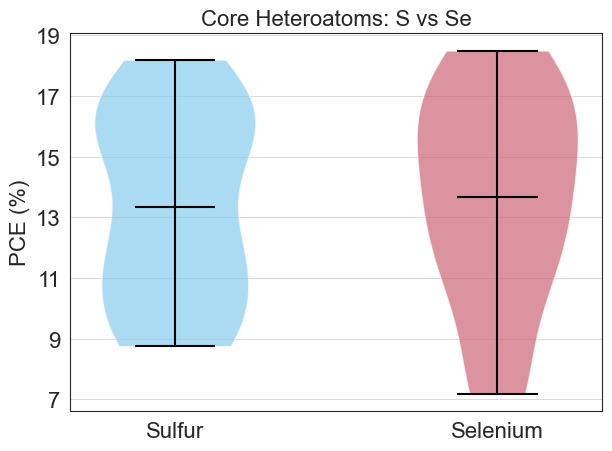

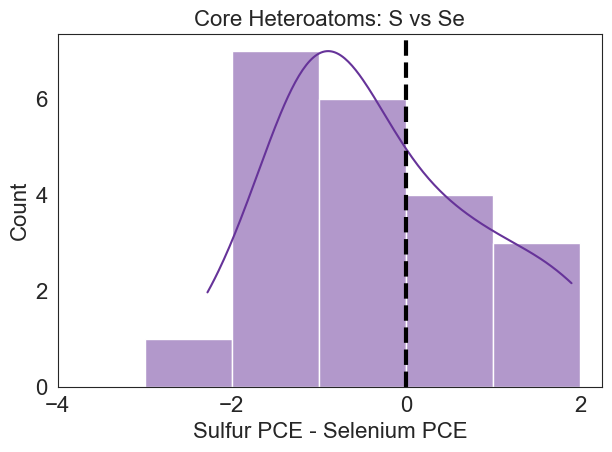

In [9]:
df = pd.read_csv("S_vs_Se.csv")
wilcoxon_test(df, "sulfur_PCE", "Se_PCE")
plot_violin(df, "sulfur_PCE", "Se_PCE", "Core Heteroatoms: S vs Se", "Sulfur", "Selenium", "S_vs_Se")
plot_hist(df, "sulfur_PCE", "Se_PCE", "Core Heteroatoms: S vs Se", "Sulfur", "Selenium", "S_vs_Se")

## S vs O

Number of samples: 13
Less than 30 samples so Wilcoxon test will be performed
The findings are NOT significant. p-value is: 0.09423828125
The average PCE of sulfur_PCE is: 8.734615384615385
The average PCE of O_PCE is: 6.7907692307692304
The average difference between the PCE is: 1.9438461538461538


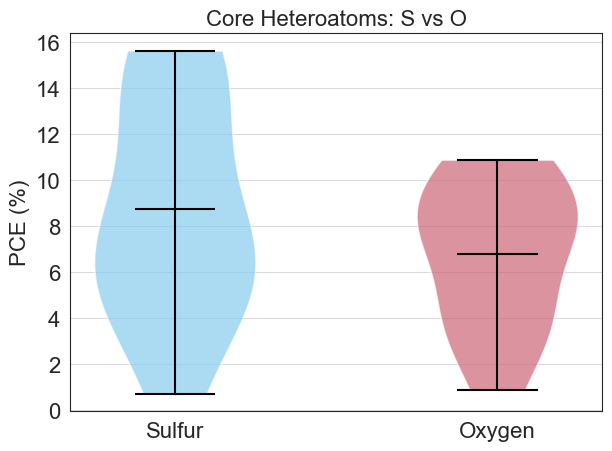

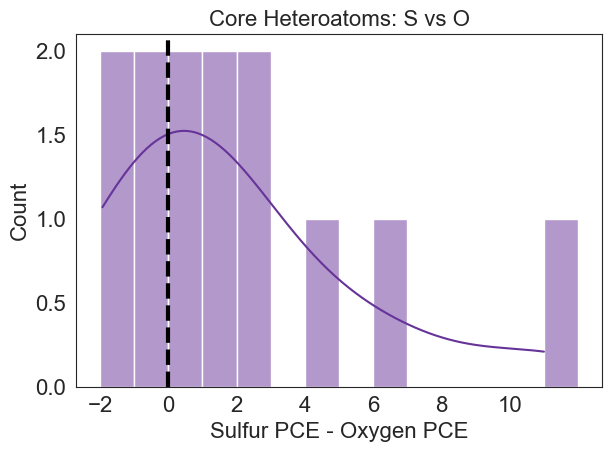

In [10]:
df = pd.read_csv("S_vs_O.csv")
wilcoxon_test(df, "sulfur_PCE", "O_PCE")
plot_violin(df, "sulfur_PCE", "O_PCE", "Core Heteroatoms: S vs O", "Sulfur", "Oxygen", "S_vs_O")
plot_hist(df, "sulfur_PCE", "O_PCE", "Core Heteroatoms: S vs O", "Sulfur", "Oxygen", "S_vs_O")

# Symmetry

Number of samples: 67
More than 30 samples so t-test will be performed
The findings are significant! p-value is: 0.0091163481996473
The average PCE of sym_med_PCE is: 12.566940298507463
The average PCE of asym_med_PCE is: 13.55134328358209
The average difference between the PCE is: 0.9844029850746269


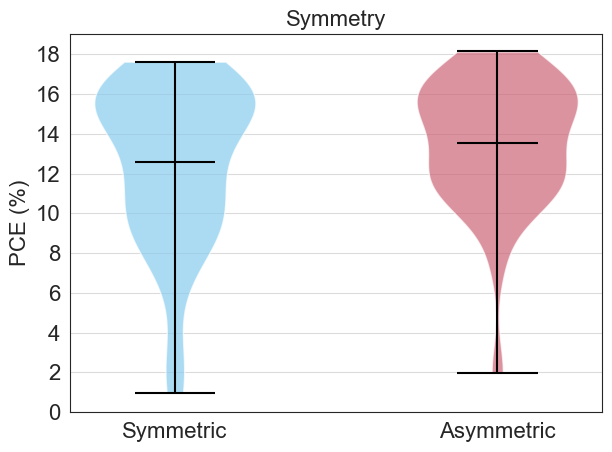

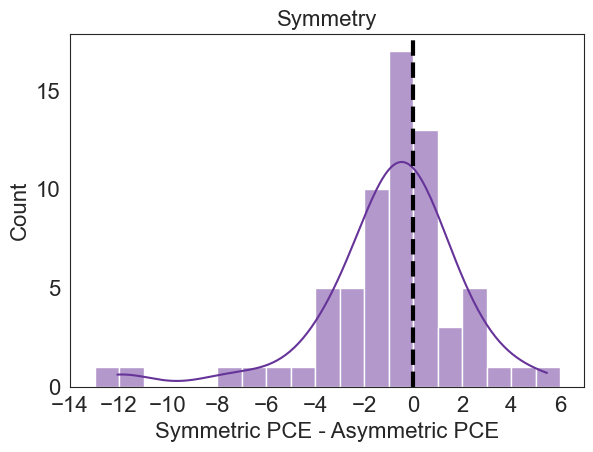

In [11]:
df = pd.read_csv("sym_trends.csv")
wilcoxon_test(df, "sym_med_PCE", "asym_med_PCE")
plot_violin(df, "sym_med_PCE", "asym_med_PCE", "Symmetry", "Symmetric", "Asymmetric", "sym_trends")
plot_hist(df, "sym_med_PCE", "asym_med_PCE", "Symmetry", "Symmetric", "Asymmetric", "sym_trends")

## pi-conjugated Linkers

Number of samples: 53
More than 30 samples so t-test will be performed
The findings are significant! p-value is: 1.1266806465253702e-05
The average PCE of no_linker_PCE is: 5.125471698113207
The average PCE of linker_PCE is: 7.457735849056604
The average difference between the PCE is: -2.3322641509433963


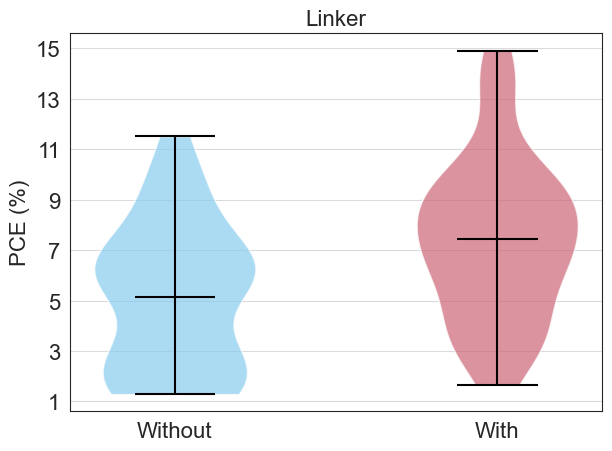

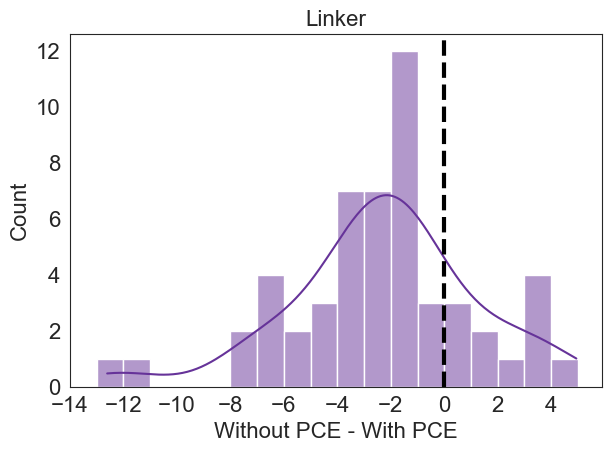

In [12]:
df = pd.read_csv("linker_vs_no_linker.csv")
wilcoxon_test(df, "no_linker_PCE", "linker_PCE")
plot_violin(df, "no_linker_PCE", "linker_PCE", "Linker", "Without", "With", "contains_linker")
plot_hist(df, "no_linker_PCE", "linker_PCE", "Linker", "Without", "With", "contains_linker")

## Isomers for fused core

Number of samples: 19
Less than 30 samples so Wilcoxon test will be performed
The findings are NOT significant. p-value is: 0.08742904663085938
The average PCE of isomer_1_PCE_inner is: 10.313157894736841
The average PCE of isomer_2_PCE_outer is: 9.50578947368421
The average difference between the PCE is: 0.8073684210526316


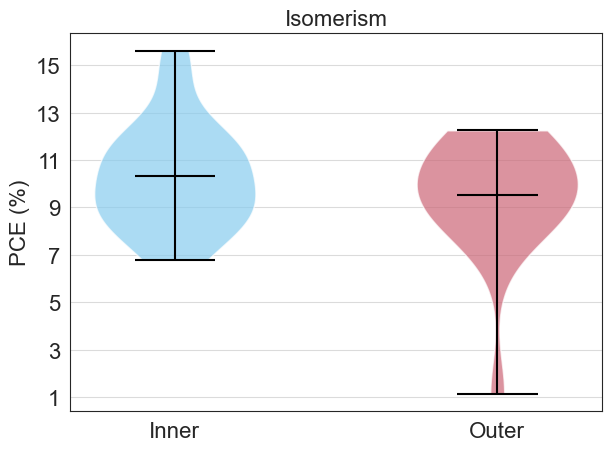

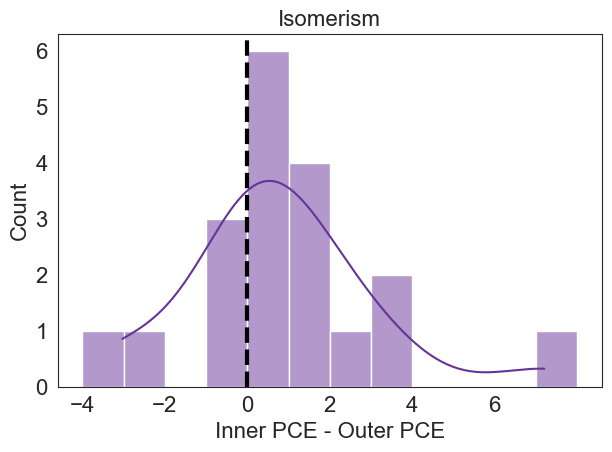

In [14]:
df = pd.read_csv("isomers_chains_core_ends.csv")
wilcoxon_test(df, "isomer_1_PCE_inner", "isomer_2_PCE_outer")
plot_violin(df, "isomer_1_PCE_inner", "isomer_2_PCE_outer", "Isomerism", "Inner", "Outer", "isomerism")
plot_hist(df, "isomer_1_PCE_inner", "isomer_2_PCE_outer", "Isomerism", "Inner", "Outer", "isomerism")